### Module 7 Assignment

In [1]:
# coding up a multi-step gibbs sampler for problem 7.5
import numpy as np
import scipy.stats as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# coding up the multi-set gibbs sampler
# equicorrelation
def mvn_gibbs(p=5,rho=0.25,T=100,*args,**kwargs):
    # initialized with a univariate draw from an N(0,1) distribution
    x_init = sp.norm.rvs(size=5)
    samples = np.zeros(shape=(T,p))
    # from the formulas given in the text
    cond_var = (1+(p-2)*rho-(p-1)*pow(rho,2))/(1+(p-2)*rho)
    mean_scale =rho*(p-1)/(1+(p-2)*rho)
    # cycle through - this is really inefficient
    idx = np.arange(p)
    samples[0,:] = x_init
    for isim in range(1,T):
        for ix in range(p):
            # this is multi-stage gibbs
            # shift from one row to another
            x_sample = samples[isim-1:isim+1,:].reshape(-1,)
            idx = ix+p
            x_bar = x_sample[ix+1:idx].mean()
            samples[isim,ix] = sp.norm.rvs(size=1,scale=pow(cond_var,0.5),loc=x_bar*mean_scale)
    return samples
    

In [3]:
# getting the empirical data
emp_data = mvn_gibbs(T=500)
emp_data_lg = mvn_gibbs(T=5000)

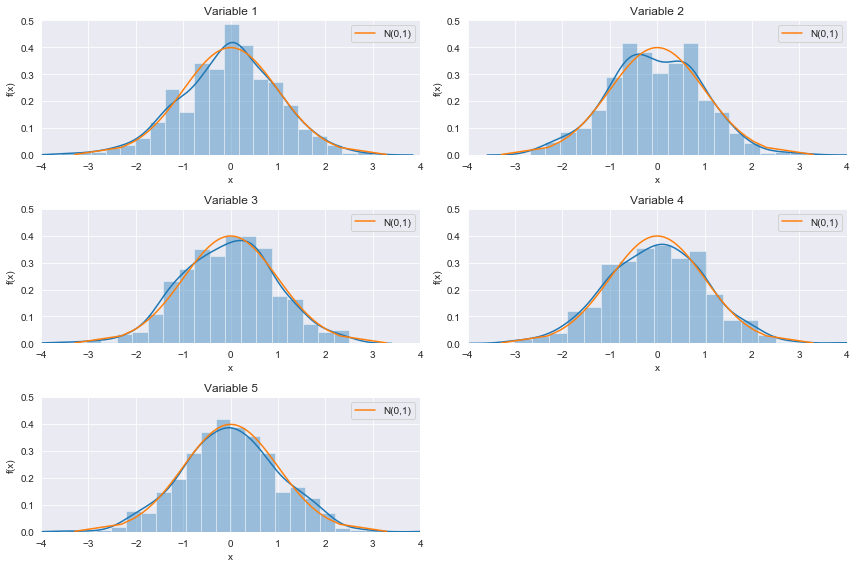

In [4]:
# plotting marginal distribution data
# first get normal distribution plot
qtiles = np.linspace(0.0005,.9995,100)
x_norm = sp.norm.ppf(qtiles)
y_norm = sp.norm.pdf(x_norm)

fig_ = plt.figure(figsize=(12,8))
ax_= plt.subplot(3,2,1)
ax_ =sns.distplot(emp_data[:,0])
sns.lineplot(x=x_norm,y=y_norm,label='N(0,1)')
ax_.set_xlim(xmin=-4,xmax=4)
ax_.set_ylim(ymin=0,ymax=0.5)
ax_.set_title('Variable 1')
ax_.set_xlabel('x')
ax_.set_ylabel('f(x)')
ax_.legend()

ax_= plt.subplot(3,2,2)
ax_ =sns.distplot(emp_data[:,1])
sns.lineplot(x=x_norm,y=y_norm,label='N(0,1)')
ax_.set_xlim(xmin=-4,xmax=4)
ax_.set_ylim(ymin=0,ymax=0.5)
ax_.set_title('Variable 2')
ax_.set_xlabel('x')
ax_.set_ylabel('f(x)')
ax_.legend()

ax_= plt.subplot(3,2,3)
ax_ =sns.distplot(emp_data[:,2])
sns.lineplot(x=x_norm,y=y_norm,label='N(0,1)')
ax_.set_xlim(xmin=-4,xmax=4)
ax_.set_ylim(ymin=0,ymax=0.5)
ax_.set_title('Variable 3')
ax_.set_xlabel('x')
ax_.set_ylabel('f(x)')
ax_.legend()

ax_= plt.subplot(3,2,4)
ax_ =sns.distplot(emp_data[:,3])
sns.lineplot(x=x_norm,y=y_norm,label='N(0,1)')
ax_.set_xlim(xmin=-4,xmax=4)
ax_.set_ylim(ymin=0,ymax=0.5)
ax_.set_title('Variable 4')
ax_.set_xlabel('x')
ax_.set_ylabel('f(x)')
ax_.legend()

ax_= plt.subplot(3,2,5)
ax_ =sns.distplot(emp_data[:,4])
sns.lineplot(x=x_norm,y=y_norm,label='N(0,1)')
ax_.set_xlim(xmin=-4,xmax=4)
ax_.set_ylim(ymin=0,ymax=0.5)
ax_.set_title('Variable 5')
ax_.set_xlabel('x')
ax_.set_ylabel('f(x)')
ax_.legend()

plt.tight_layout()
plt.show()

In [6]:
# part b
# timing the function
%timeit mvn_gibbs(T=500)

99.1 ms ± 4.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
# compare to scipy multivariate normal
mu = np.zeros((5,))
Imat = np.identity(5)
Jmat = np.ones((5,5))
covar = (1-0.25)*Imat+0.25*Jmat

In [15]:
%timeit sp.multivariate_normal(mean=mu,cov=covar).rvs(size=500)

944 µs ± 35.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
# ratio of times
99.1e3/944

104.97881355932203